## SIR Model

In [44]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style= "darkgrid")

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

In [45]:
df_analyse = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep = ';')
df_analyse.sort_values('date', ascending = True).head()

,date,Italy,US,Spain,Germany,India
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [110]:
df_analyse.iloc[35:] # no. of cases at 35th row index for germany

,date,Italy,US,Spain,Germany,India
35,2020-02-26,453,16,13,21,3
36,2020-02-27,655,17,15,26,3
37,2020-02-28,888,17,32,53,3
38,2020-02-29,1128,25,45,66,3
39,2020-03-01,1694,32,84,117,3
...,...,...,...,...,...,...
881,2022-06-21,17959329,86452232,12613634,27454225,43331645
882,2022-06-22,18014202,86636306,12613634,27573585,43344958
883,2022-06-23,18071634,86757621,12613634,27681775,43362294
884,2022-06-24,18128044,86909716,12681820,27771111,43378234


In [85]:
N0 = 1000000
beta = 0.6 # infection rate
gamma = 0.2 # recovery rate

I0 = df_analyse.Germany[50]
S0 = N0-I0
R0 = 0

In [86]:
def SIR_model(SIR,beta, gamma):
    '''Simple SIR model
        S - susceptible population
        I - Infected people
        R - Recovered population
        beta:
        
        Overall condition is that the sum of changes (differences) sum up to 0
        dS+dI+dR = 0
        S+I+R = N (Constant size of the population)
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return ([dS_dt, dI_dt, dR_dt])

In [87]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns = {'susceptible' : S0,
                                           'infected': I0,
                                           'recovered': R0})

for each_t in np.arange(100):
    
    new_delta_vec = SIR_model(SIR, beta, gamma)
    
    SIR = SIR + new_delta_vec
    
    propagation_rates = propagation_rates.append({'susceptible':SIR[0],
                                                 'infected':SIR[1],
                                                 'recovered':SIR[2]}, ignore_index = True)
propagation_rates

C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates = propagation_rates.append({'susceptible':SIR[0],
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\4282926422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,susceptible,infected,recovered
0,996212.967297,3313.232703,473.8
1,994232.556067,4630.997392,1136.446541
2,991469.983042,6467.370939,2062.646019
3,987622.660549,9021.219244,3356.120207
4,982276.924219,12562.711726,5160.364056
5,974872.887118,17454.206481,7672.906401
6,964663.50752,24172.744783,11163.747697
7,950672.368658,33329.334688,15998.296654
8,931661.202126,45674.634283,22664.163591
9,906129.231317,62071.678236,31799.090448


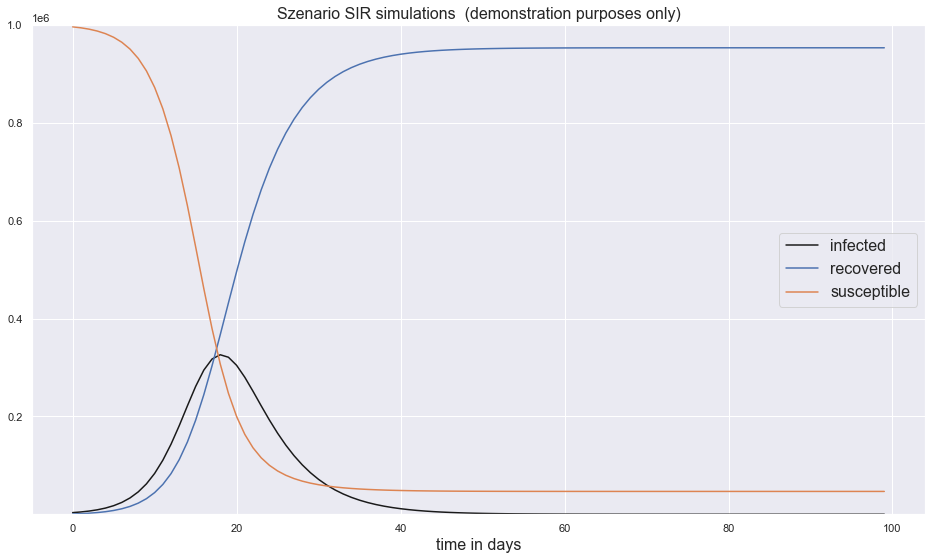

In [89]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [98]:
from scipy import optimize
from scipy import integrate

ydata = np.array(df_analyse.Germany[45:])
t = np.arange(len(ydata)) # time period

In [99]:
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.6

In [100]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [101]:
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0,I0,R0), t, args = (beta, gamma))[:,1]

In [102]:
popt = [0.4, 0.1] # beta and gamma values
fit_odeint(t, *popt) # * used to add all values of a variable in the function

array([ 6.84000000e+02,  9.22994933e+02,  1.24531145e+03,  1.67984649e+03,
        2.26539455e+03,  3.05393632e+03,  4.11493673e+03,  5.54089421e+03,
        7.45438063e+03,  1.00167476e+04,  1.34384856e+04,  1.79908073e+04,
        2.40172342e+04,  3.19426022e+04,  4.22747753e+04,  5.55914806e+04,
        7.25015903e+04,  9.35685704e+04,  1.19187062e+05,  1.49416218e+05,
        1.83798305e+05,  2.21222750e+05,  2.59915255e+05,  2.97611724e+05,
        3.31906846e+05,  3.60678193e+05,  3.82439796e+05,  3.96512909e+05,
        4.02991278e+05,  4.02560499e+05,  3.96262556e+05,  3.85279775e+05,
        3.70775838e+05,  3.53799801e+05,  3.35241677e+05,  3.15823029e+05,
        2.96107789e+05,  2.76522601e+05,  2.57379976e+05,  2.38900575e+05,
        2.21232909e+05,  2.04469890e+05,  1.88662305e+05,  1.73829539e+05,
        1.59967978e+05,  1.47057517e+05,  1.35066551e+05,  1.23955770e+05,
        1.13681032e+05,  1.04195495e+05,  9.54512176e+04,  8.74003080e+04,
        7.99957641e+04,  

In [103]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [2.90539087e-03 1.44959365e-05]  start infect: 684
Optimal parameters: beta = 0.12598777604569927  and gamma =  -0.004090826824973368


C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\kenil\AppData\Local\Temp\ipykernel_32652\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\kenil\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [104]:
fitted=fit_odeint(t, *popt)

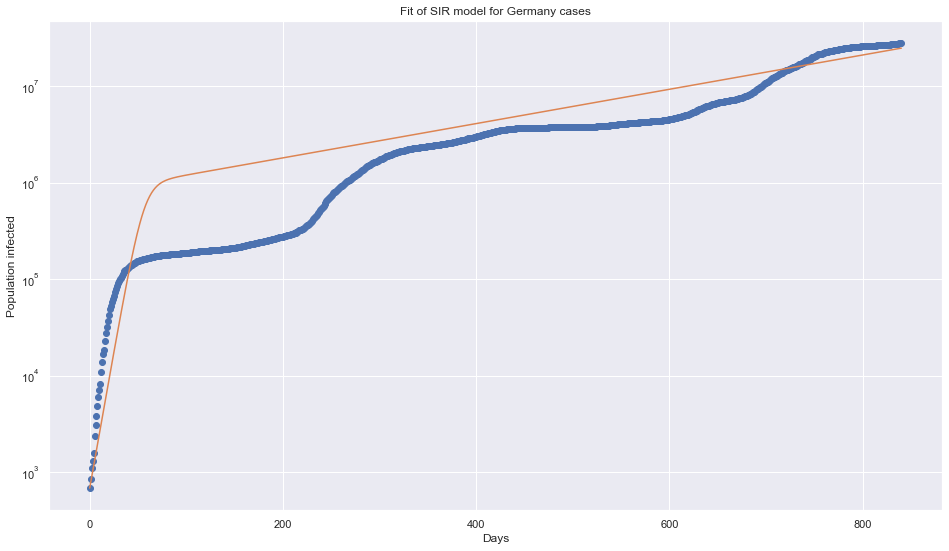

Optimal parameters: beta = 0.12598777604569927  and gamma =  -0.004090826824973368
Basic Reproduction Number R0  -30.797631245737097
This ratio is derived as the expected number of new infections - these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [105]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections - these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic Dashboard of SIR

In [3]:
# %load C:/Users/kenil/Data Science/ads_covid-19/src/visualization/SIR_model.py
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State
from SIR_model_func import SIR_modelling

import plotly.graph_objects as go
from scipy import optimize
from scipy import integrate

import os
print(os.getcwd())
df_analyse = pd.read_csv('C:/Users/kenil/Data Science/ads_covid-19/data/processed/COVID_final_set.csv', sep = ';')
df_final=df_analyse[(df_analyse['country']=='Germany')|(df_analyse['country']=='Canada')|(df_analyse['country']=='Kuwait')]
df_final
fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([
    
    dcc.Markdown('''
                 
    # Implmentation of SIR model for 3 Countries
    
    '''),
    
    
    dcc.Dropdown(
        id = 'country_drop_down',
        options=[ {'label': each,'value':each} for each in df_final['country'].unique()],
        value= 'Germany', # which are pre-selected
        multi=False),
    
    dcc.Graph(figure = fig, id = 'SIR_graph')
    ])

                 
def SIR(countries):
    
    SIR_modelling()
    
@app.callback(
    Output('SIR_graph', 'figure'),
    [Input('country_drop_down', 'value')])

def update_SIR_figure(country_drop_down):
    
    traces = []
    
    df_plot = df_analyse[df_analyse['country'] == country_drop_down]
    df_plot = df_plot[['state', 'country', 'confirmed', 'date']].groupby(['country', 'date']).agg(np.sum).reset_index()
    df_plot.sort_values('date', ascending = True).head()
    df_plot = df_plot.confirmed[35:]
    
    t, fitted = SIR_modelling(df_plot)
    
    traces.append(dict (x = t,
                        y = fitted,
                        mode = 'lines',
                        opacity = 0.9,
                        name = 'SIR-fit')
                  )
    
    traces.append(dict (x = t,
                        y = df_plot,
                        mode = 'markers',
                        opacity = 0.9,
                        name = 'Original Data')
                  )
    
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                title = 'SIR model fitting',

                xaxis= {'title':'Days',
                       'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis={'title': "Infected population"},
        )
    }

if __name__ == '__main__':
    
    app.run_server(debug = True, use_reloader = False)


C:\Users\kenil\Data Science\ads_covid-19\notebooks
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
standard deviation errors :  [1.34148106e-04 7.72914966e-05]  start infect: 21.0
Optimal parameters: beta = 0.014891051815749134  and gamma =  -0.0052472756608160954
standard deviation errors :  [0.00036415 0.00035136]  start infect: 26.0
Optimal parameters: beta = 0.04597254127996376  and gamma =  0.02992205296885011
standard deviation errors :  [0.00015946 0.00013142]  start infect: 20.0
Optimal parameters: beta = 0.025442479185353  and gamma =  0.006766361657428425
standard deviation errors :  [1.34148106e-04 7.72914966e-05]  start infect: 21.0
Optimal parameters: beta = 0.014891051815749134  and gamma =  -0.0052472756608160954
standard deviation errors :  [0.00015946 0.00013